Does various predicting factors which have been chosen initially really affect the Life expectancy? What are the predicting variables actually affecting the life expectancy?

Should a country having a lower life expectancy value(<65) increase its healthcare expenditure in order to improve its average lifespan?

How does Infant and Adult mortality rates affect life expectancy?

Does Life Expectancy has positive or negative correlation with eating habits, lifestyle, exercise, smoking, drinking alcohol etc.

What is the impact of schooling on the lifespan of humans?

Does Life Expectancy have positive or negative relationship with drinking alcohol?

What is the impact of Immunization coverage on life Expectancy?

In [152]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from geopy.distance import distance

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import (mean_absolute_error as mae, 
                            mean_squared_error as mse, 
                            median_absolute_error as median_eror)
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import shap
pd.set_option("Display.Max_Columns", 22)

In [153]:
life = pd.read_csv(r'C:\Users\Pichau Gamer\Desktop\DS\Portfolio\Life Expectancy\Life_data.csv')

In [154]:
life.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [155]:
life.isnull().sum()*100/life.isnull().count()

Country                             0.000000
Year                                0.000000
Status                              0.000000
Life expectancy                     0.340368
Adult Mortality                     0.340368
infant deaths                       0.000000
Alcohol                             6.603131
percentage expenditure              0.000000
Hepatitis B                        18.822328
Measles                             0.000000
 BMI                                1.157250
under-five deaths                   0.000000
Polio                               0.646698
Total expenditure                   7.692308
Diphtheria                          0.646698
 HIV/AIDS                           0.000000
GDP                                15.248468
Population                         22.191967
 thinness  1-19 years               1.157250
 thinness 5-9 years                 1.157250
Income composition of resources     5.684139
Schooling                           5.547992
dtype: flo

In [156]:
life.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [157]:
life.rename(columns={" BMI ":"BMI", "Life expectancy ":"Life_Exp", "Adult Mortality": "Adult_Mortality",
                    "infant deaths": "Infant_Deaths", "percentage expenditure":"Pctg_Exp", "Hepatitis B":"HepB",
                    "under-five deaths ": "Under_Five_Deaths",' HIV/AIDS':'HIV/AIDS',' thinness  1-19 years': 'Thinness_1to19',
                    ' thinness 5-9 years':'Thinness_5to9', 'Income composition of resources': 'ICR'}, inplace=True)

In [158]:
life.columns

Index(['Country', 'Year', 'Status', 'Life_Exp', 'Adult_Mortality',
       'Infant_Deaths', 'Alcohol', 'Pctg_Exp', 'HepB', 'Measles ', 'BMI',
       'Under_Five_Deaths', 'Polio', 'Total expenditure', 'Diphtheria ',
       'HIV/AIDS', 'GDP', 'Population', 'Thinness_1to19', 'Thinness_5to9',
       'ICR', 'Schooling'],
      dtype='object')

In [159]:
country_list = life.Country.unique()
fill_list = ['Life_Exp', 'Adult_Mortality','Alcohol', 'HepB', 'BMI', 'Polio', 'Total expenditure', 'Diphtheria ', 
            'GDP', 'Population', 'Thinness_1to19', 'Thinness_5to9', 'ICR', 'Schooling']

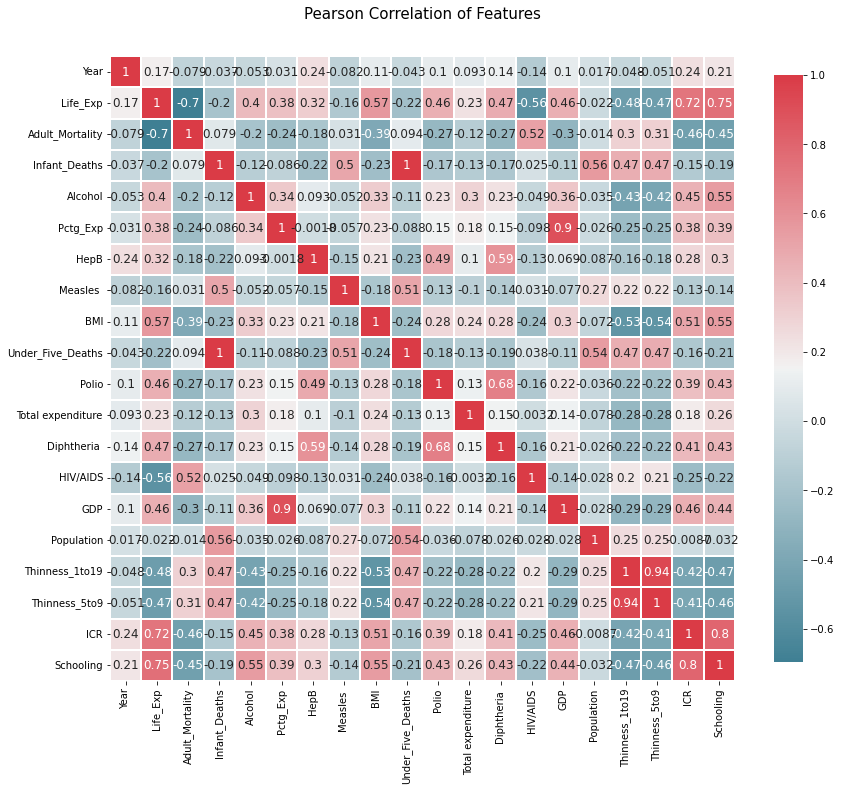

In [160]:
for country in country_list:
    life.loc[life['Country'] == country, fill_list] = life.loc[life['Country'] == country, fill_list].interpolate()
    

def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)
    
correlation_heatmap(life)


Does various predicting factors which have been chosen initially really affect the Life expectancy? What are the predicting variables actually affecting the life expectancy?

By plotting the correlation matrix we're able to tell which features seem to have a higher influence in determining life expectancy and we can also check their relation to one another.
Features such as Adult Mortality and HIV/AIDS deaths had a really big impact lowering life expectancy overall, which was somewhat expected.

ICR and Schooling were shown to have the biggest positive impact, increasing life expectancy more than other feeatures.

In [161]:
# Hepatitis B has never been a proeminent disease in Europe, so vaccination wasn't mandatory in most european countries
# during this period, which explains why the NaN percentage is so high for this feature. We'll opt for dropping the feature.

# We can also tell from the Correlation Matrix that Population (-0.022) isn't a relevant feature by itself, so we're dropping
# it entirely due to the amount of NaNs

# Since GDP and Percentage Expenditure features seem to have a strong correlation between each other,
# we can also drop GDP feature (14% NaN after interpolation)

life = life.drop(['Population','GDP','HepB'], axis=1)

# For the remaining features we'll simply drop missing values altogether

life.dropna(inplace=True)
life.isnull().sum()*100/life.isnull().count()

Country              0.0
Year                 0.0
Status               0.0
Life_Exp             0.0
Adult_Mortality      0.0
Infant_Deaths        0.0
Alcohol              0.0
Pctg_Exp             0.0
Measles              0.0
BMI                  0.0
Under_Five_Deaths    0.0
Polio                0.0
Total expenditure    0.0
Diphtheria           0.0
HIV/AIDS             0.0
Thinness_1to19       0.0
Thinness_5to9        0.0
ICR                  0.0
Schooling            0.0
dtype: float64

In [162]:
life.head(2)

,Country,Year,Status,Life_Exp,Adult_Mortality,Infant_Deaths,Alcohol,Pctg_Exp,Measles,BMI,Under_Five_Deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,Thinness_1to19,Thinness_5to9,ICR,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,1154,19.1,83,6.0,8.16,65.0,0.1,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,492,18.6,86,58.0,8.18,62.0,0.1,17.5,17.5,0.476,10.0


## Exploratory Data Analysis


## Life Expectancy

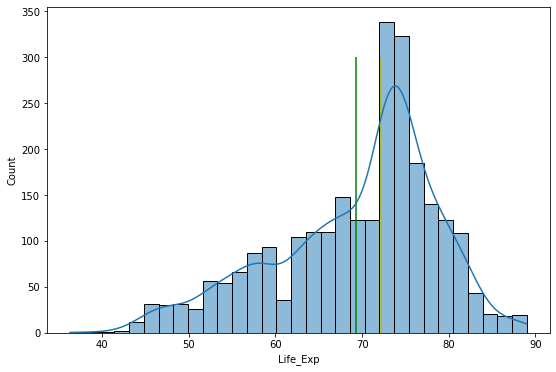

In [163]:
f, ax = plt.subplots(figsize=(9,6))
sns.histplot(data=life, x='Life_Exp', kde=True, ax=ax)
plt.vlines(x=life['Life_Exp'].mean(), ymin=0, ymax=300,color='g',
          label=f"Mean = {life['Life_Exp'].mean():.2f} ")
plt.vlines(x=life['Life_Exp'].median(),ymin=0, ymax=300, color='y')

In [164]:
def plot_num(df, col1, col2 = 'Life_Exp', hue='Status', kind='scatter', xlim=None):
    
    g = sns.jointplot(data=df, x=col1, y=col2, hue=hue, kind=kind, height=8, ratio=2,
                     xlim=xlim, ax=ax)

Let's start by finding out how Life expectancy has changed throughout the years. We'd also like to tell whether being a developed or a developing country influences these rates.

## Year

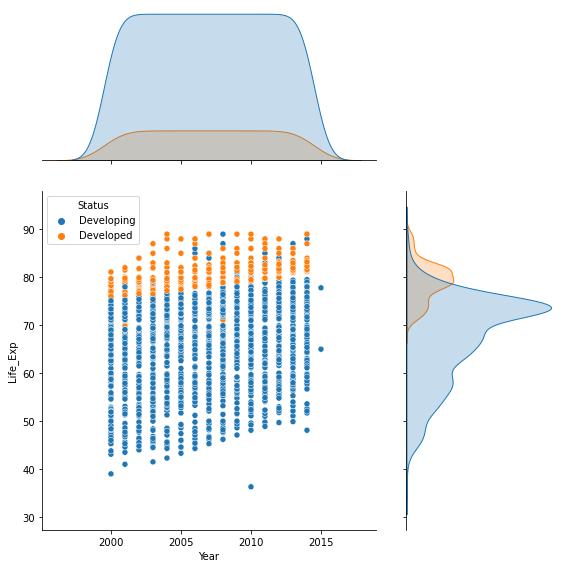

In [165]:
plot_num(life, 'Year', kind='scatter') 

How does Infant and Adult mortality rates affect life expectancy? Let's find out!

## Adult Mortality

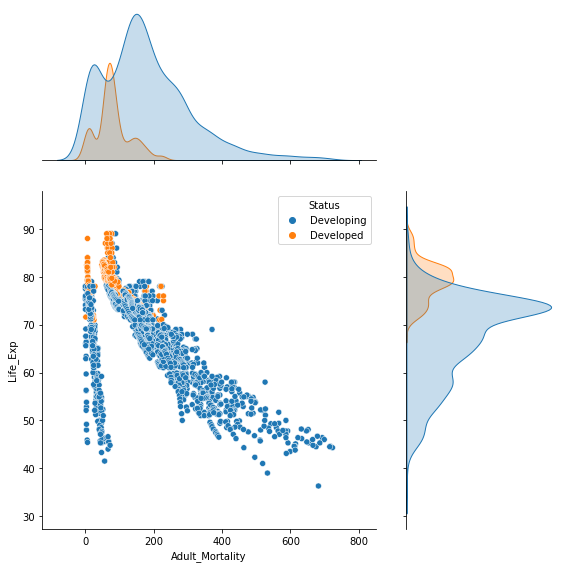

In [166]:
plot_num(life, 'Adult_Mortality', kind='scatter')

## Infant Deaths

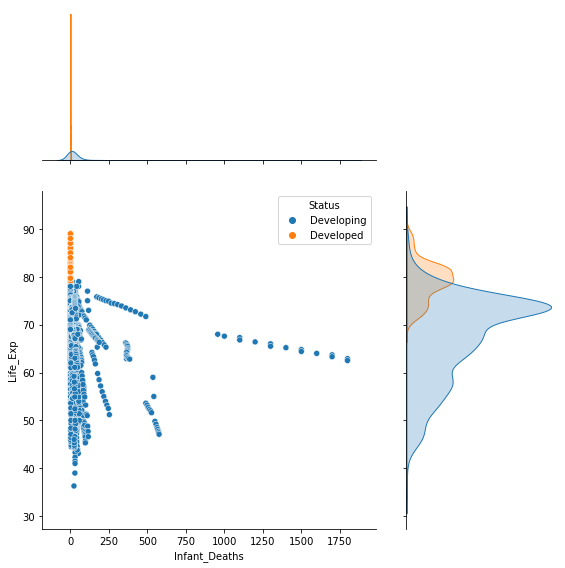

In [167]:
plot_num(life, 'Infant_Deaths', kind='scatter')

Adult mortality defines the probability of someone dying between the ages of 15 and 60, so we already expected it to be one of the most important features.

Infant deaths don't seem relevant for countries with a life expecntacy over 80 y.o. For developing countries it's still an issue to overcome. 



Does Life Expectancy have positive or negative correlation with eating habits, lifestyle, exercise, smoking, drinking alcohol etc.

## Alcohol Consumption

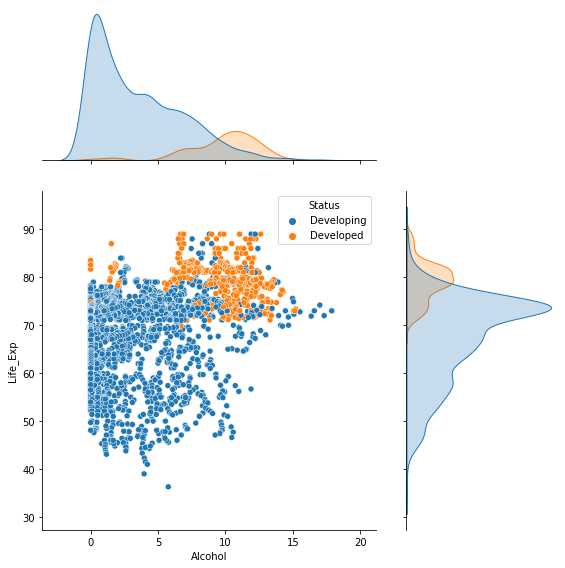

In [168]:
plot_num(life, 'Alcohol', kind='scatter')

Although at first glance there seems to be a positive correlation, our matrix earlier didn't support this point of view (corr. between alcohol consumption and life exp. is -0.053).

Most likely there are other factors which influence alcohol consumption and life expectancy separately (such as GDP per capita and healtcare)

## GDP Percentage Expenditure

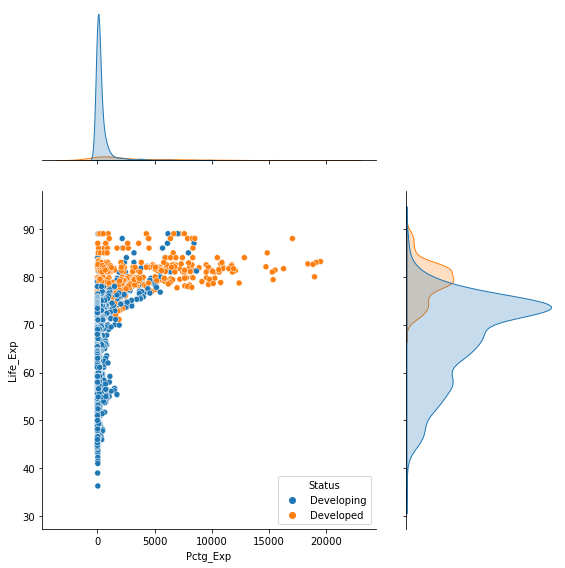

In [169]:
plot_num(life, 'Pctg_Exp', kind='scatter')

Should a country having a lower life expectancy value(<65) increase its healthcare expenditure in order to improve its average lifespan?

We can see there's a timid trend towards individual expenditure increasing life expectancy, but maybe government investment would have a bigger impact, so we'll check it aswell.

## Total Governemt Expenditure

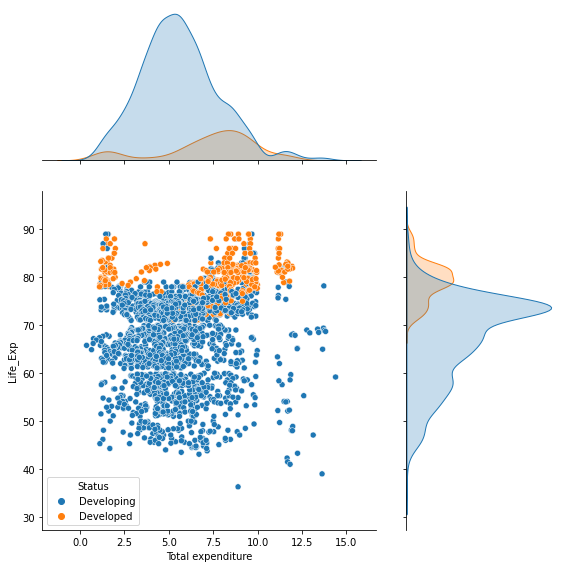

In [170]:
plot_num(life,'Total expenditure', kind='scatter')

Certainly other factors come into play here and while developed countries do tend to have higher health expenses it's not unanimous amongst them. We can also notice countries with very low governemnt expenditure and a higher life expectancy probably due to different policies within each country.

What is the impact of schooling on the lifespan of humans?

## Schooling

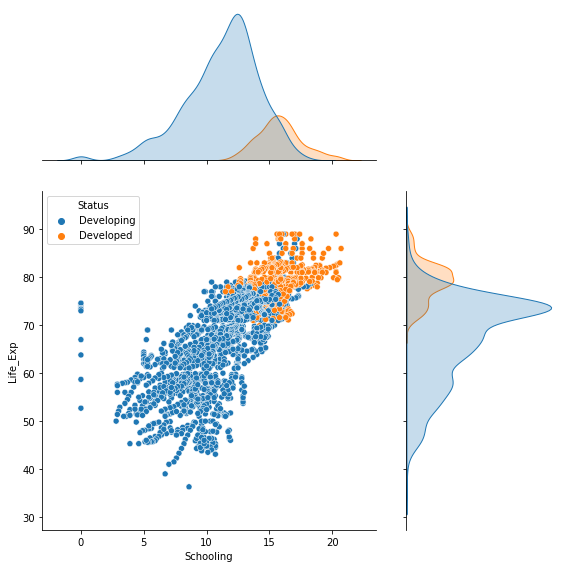

In [171]:
plot_num(life,'Schooling', kind='scatter')

With the exception of a few outliers there's a clear linear relationship between amount of years in school and life expectancy.

## Number of Measles Cases per 1000 population

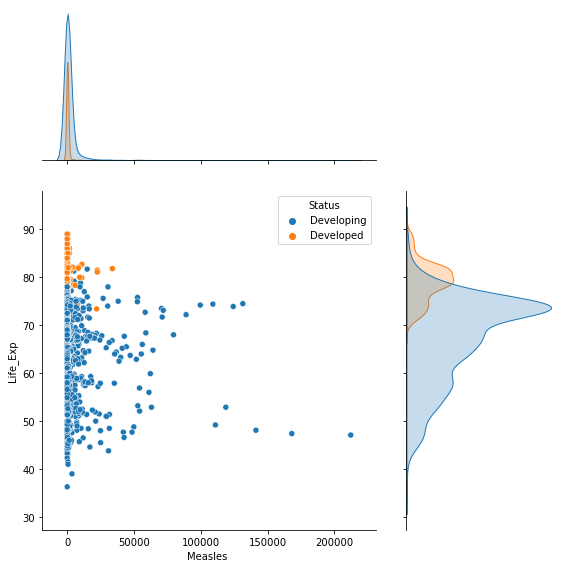

In [172]:
plot_num(life, 'Measles ', kind='scatter')

## Number of Under-5 deaths per 1000 population

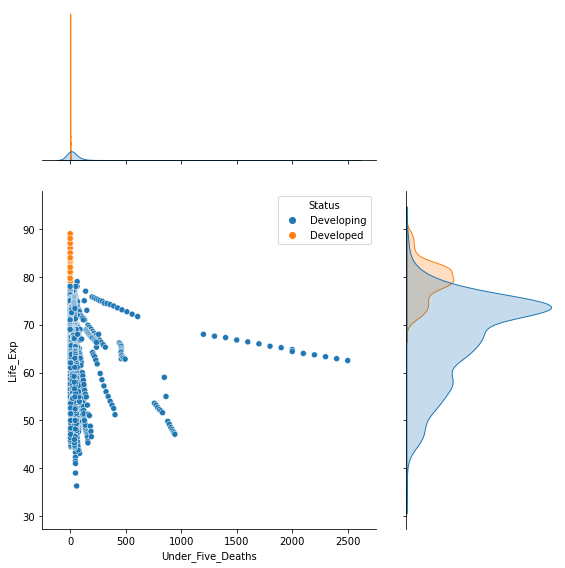

In [173]:
plot_num(life, 'Under_Five_Deaths', kind='scatter')

What is the impact of Immunization coverage on life Expectancy?

## Polio Vaccionation

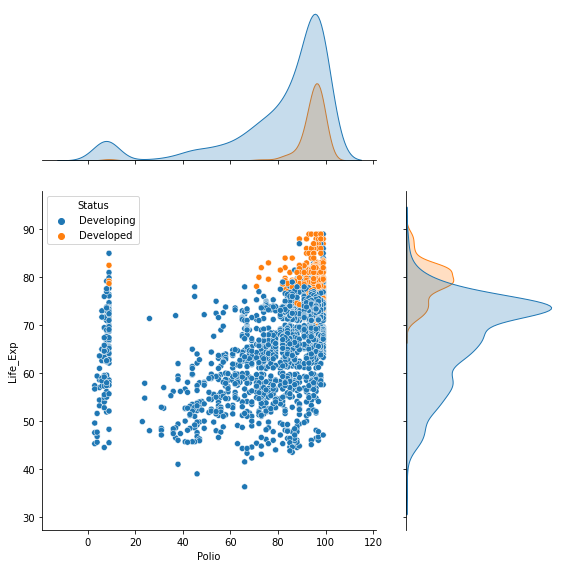

In [174]:
plot_num(life,'Polio', kind='scatter')

## Diphtheria Immunization

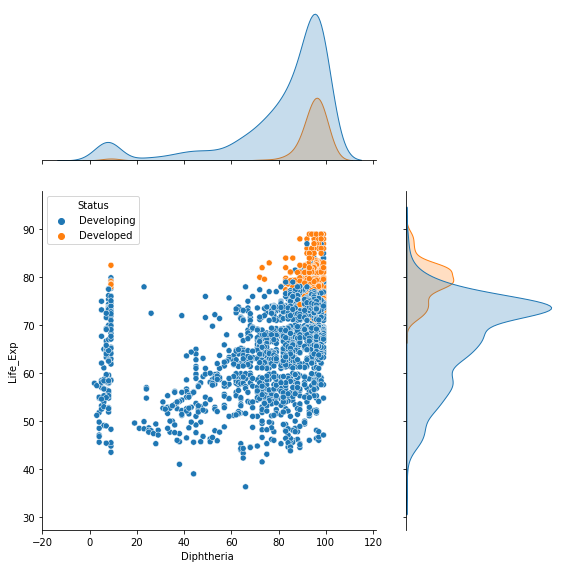

In [175]:
plot_num(life,'Diphtheria ', kind='scatter')

In countries where these diseases are a public health issue we can see a positive relationship between Immunization
percentage and life expectancy

## HIV/AIDS deaths per 1000 live births

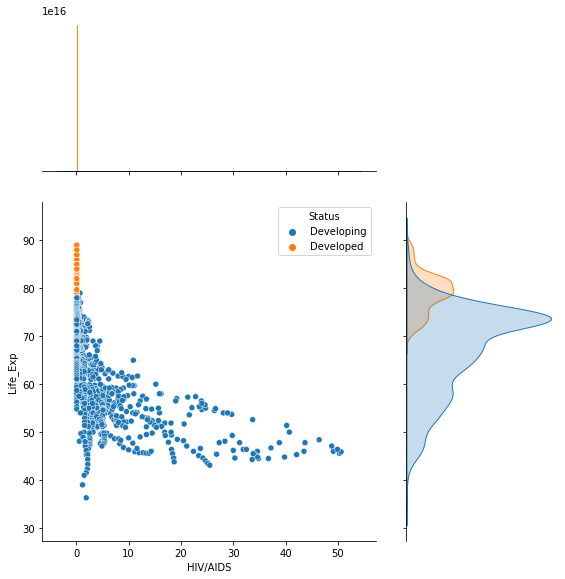

In [176]:
plot_num(life,'HIV/AIDS', kind='scatter')

In [177]:
life['Status'] = life['Status'].map({"Developed":1, "Developing":0})
life['Status'].value_counts()

0    2132
1     435
Name: Status, dtype: int64

## Machine Learning Modeling

In [178]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import (mean_absolute_error as mae, 
                            mean_squared_error as mse, 
                            median_absolute_error as median_eror)

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [179]:
Y = life['Life_Exp']
X = life.drop(['Country','Life_Exp'], axis=1)

In [180]:
cat_cols = ['Status']
num_cols = [x for x in X.columns if x not in cat_cols]

numeric_transformer = Pipeline(steps=[("scaler", MinMaxScaler())])

preprocessor = ColumnTransformer(transformers=[("num", numeric_transformer, num_cols)],
                                              remainder='passthrough')

def ml_model(x, y, preprocess_object, model, parameters_to_try=None):
    
    model_pipe = Pipeline(steps=[("transformer", preprocess_object),
                                ("regressor", model)])
    
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
    
    if parameters_to_try:
        randomsearch = RandomizedSearchCV(estimator=model_pipe,
                                        param_distributions=parameters_to_try,
                                        n_iter=50,
                                        n_jobs=-1,
                                        cv=10,
                                        random_state=42
                                        )
        randomsearch.fit(X_train,y_train)
        
        return randomsearch, X_test, y_test
    else:
        model_pipe.fit(X_train, y_train)
        return model_pipe, X_test, y_test

## Linear Regression

In [181]:
linearmodel, X_test, y_test = ml_model(X, Y, preprocessor, LinearRegression())

In [182]:
print(f"""
The scores for linear regression are:
R2: {linearmodel.score(X_test, y_test):.2f}
Mean absolute error: {mae(y_test, linearmodel.predict(X_test)):.2f}
Mean squared error: {mse(y_test, linearmodel.predict(X_test)):.2f}
Median absolute error: {median_eror(y_test, linearmodel.predict(X_test)):.2f}
""")


The scores for linear regression are:
R2: 0.83
Mean absolute error: 2.97
Mean squared error: 15.29
Median absolute error: 2.38



## RandomForest Regressor

In [183]:
params = {
    'regressor__n_estimators':[50,100, 150],
    'regressor__max_depth':[None,5,8,10, 12],
    'regressor__min_samples_split':[2,5,10, 15],
    'regressor__min_samples_leaf':[1,3,8,10,12],
}

rf, X_test, y_test = ml_model(X, Y, preprocessor, RandomForestRegressor(n_jobs=-1, random_state=42), params)

In [184]:
print(f"""
The scores for linear regression are:
R2: {rf.score(X_test, y_test):.2f}
Mean absolute error: {mae(y_test, rf.predict(X_test)):.2f}
Mean squared error: {mse(y_test, rf.predict(X_test)):.2f}
Median absolute error: {median_eror(y_test, rf.predict(X_test)):.2f}
""")


The scores for linear regression are:
R2: 0.96
Mean absolute error: 1.16
Mean squared error: 3.69
Median absolute error: 0.61



## GradientBoosting Regressor

In [185]:
params = {
    'regressor__n_estimators':[50,100, 150],
    'regressor__subsample':[1,0.8],
    'regressor__min_samples_split':[2,5,10, 15],
    'regressor__min_samples_leaf':[1,3,8,10,12],
    'regressor__max_depth':[3,5,6,8,10],
    'regressor__alpha':[0.9,0.8,0.95]
}
#creating and training model
gb, X_test, y_test = ml_model(X, Y, preprocessor, GradientBoostingRegressor(random_state=42), params)

In [186]:
print(f"""
The scores for linear regression are:
Best score in training data: {gb.best_score_:.2f}
R2: {gb.score(X_test, y_test):.2f}
Mean absolute error: {mae(y_test, gb.predict(X_test)):.2f}
Mean squared error: {mse(y_test, gb.predict(X_test)):.2f}
Median absolute error: {median_eror(y_test, gb.predict(X_test)):.2f}

The best parameters are:{gb.best_params_}""")




The scores for linear regression are:
Best score in training data: 0.96
R2: 0.96
Mean absolute error: 1.10
Mean squared error: 3.26
Median absolute error: 0.67

The best parameters are:{'regressor__subsample': 0.8, 'regressor__n_estimators': 150, 'regressor__min_samples_split': 15, 'regressor__min_samples_leaf': 8, 'regressor__max_depth': 10, 'regressor__alpha': 0.9}
